# Сборный проект: анализ рынка продаж видеоигр
## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года\.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
`Name` — название игры\
`Platform` — платформа\
`Year_of_Release` — год выпуска\
`Genre` — жанр игры\
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)\
`EU_sales` — продажи в Европе (миллионы проданных копий)\
`JP_sales` — продажи в Японии (миллионы проданных копий)\
`Other_sales` — продажи в других странах (миллионы проданных копий)\
`Critic_Score` — оценка критиков (максимум 100)\
`User_Score` — оценка пользователей (максимум 10)\
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\
Данные за 2016 год могут быть неполными.

## Загрузка данных

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt, factorial

In [2]:
try:
    games = pd.read_csv('games.csv', sep=',')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')

In [3]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Ознакомившись с предоставленным датасетом, видим, что в столбцах имеются пропуски, а также некорректные типы данных.\
На следующем этапе приведем данные к корректному виду.

## Предобработка данных

In [5]:
# check
# пропущенные значения бары

def pass_value_barh_cor(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16, grid = True)
            .set_title('Пропуски в датасете (%)' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

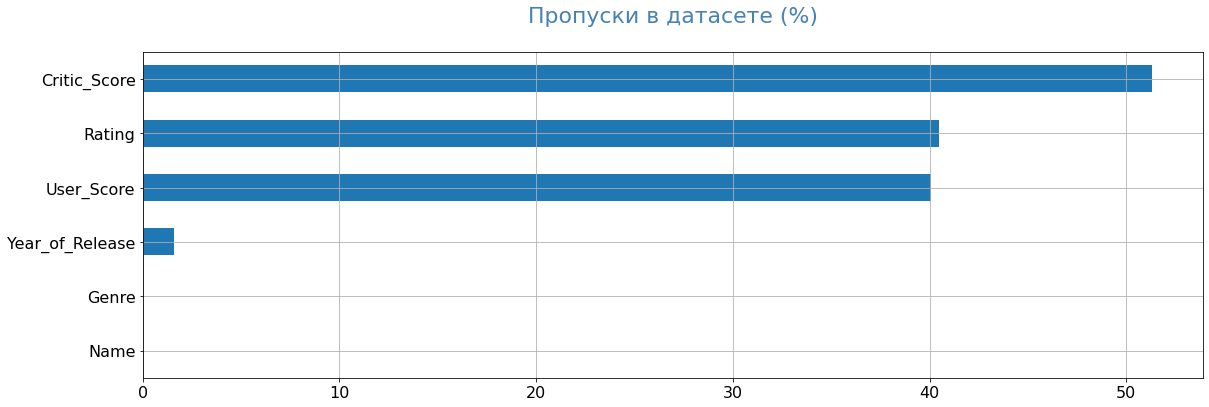

In [6]:
pass_value_barh_cor(games)

Приведем названия столбцов к нижнему регистру.

In [7]:
games.columns = games.columns.str.lower()

In [8]:
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release'] = games['year_of_release'].astype('int64')

Столбец с `user_score` на данный момент содержит данные в типе object.

In [9]:
games['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме обычных числовых значений и nan имеется значение tbd (to be determined — будет определено). Приведем данные к типу float, заменив tbd и nan на 0, так как оценки в таких случаях нет.

In [10]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1
games['user_score'] = games['user_score'].fillna(-1)
games['user_score'] = games['user_score'].astype('float64')
games['critic_score'] = games['critic_score'].fillna(-1)

`critic_score` и `user_score` содержат схожую по смыслу информацию — оценки, при этом используется разная градация. Приведем к одинаковой для дальнейшего удобства сравнения.

In [11]:
games['user_score'] = games['user_score'] * 10

In [12]:
games.duplicated().sum() 

0

Явных дубликатов нет. Проверим неявные.

In [13]:
games.duplicated(['name','platform','year_of_release']).sum()

2

В датасете есть два неявных дубликата: в этих строках одинаковые значения в столбцах `name`, `platform` и `year_of_release`. Такой срез позволяет нам судить о том, что это реально дубликаты, а не, например, переиздания игры (были бы разные года издания) или версии для разных платформ.

In [14]:
duplicated_games = games[games.duplicated(['name','platform','year_of_release'], keep=False)]
duplicated_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,55.0,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1.0,-10.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1.0,-10.0,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,55.0,E


In [15]:
games = games.drop_duplicates(['name','platform','year_of_release']).reset_index(drop=True)

In [16]:
games.isna().sum()

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6765
dtype: int64

In [17]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,-1.0,-10.0,NaN


Восстановить строку по имеющимся данным мы не можем, поэтому удалим ее.

In [18]:
games = games.dropna(subset=['name'])

In [19]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Очевидно, строка с пропуском в имени была и строкой с пропуском в жанре, и на предыдущем шаге мы от нее избавились.

In [20]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

In [21]:
games['rating'].unique() 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Остаются пропуски в столбце `rating`, содержащем информацию о рейтинге от организации ESRB.\
ESRB функционирует с 1994 года и занимается определением рейтинга игр, выпускающихся на территории США и Канады. То есть, если игра была выпущена ранее 1994 года и/или не на территории США и Канады, она может не иметь рейтинга по этой системе.\
Пропуски здесь оставим, но заменим nan на unknown.

In [22]:
games['rating'] = games['rating'].fillna('unknown')

In [23]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [24]:
display(games.sample(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
964,The Orange Box,X360,2007,Shooter,1.09,0.53,0.02,0.17,96.0,89.0,M
5842,Burnout,GC,2002,Racing,0.23,0.06,0.00,0.01,78.0,79.0,E
16664,Psychic Detective,PS,1995,Adventure,0.01,0.00,0.00,0.00,-1.0,-10.0,unknown
12937,Jissen Pachislot Hisshouhou! Hokuto no Ken DS SE,DS,2006,Misc,0.00,0.00,0.05,0.00,-1.0,-10.0,unknown
15023,Pop'n Music 12 Iroha,PS2,2006,Simulation,0.00,0.00,0.02,0.00,-1.0,-10.0,unknown
3995,Super Robot Taisen Z,PS2,2008,Strategy,0.00,0.00,0.50,0.00,-1.0,-10.0,unknown
15322,Maji de Manabu: LEC de Ukaru - DS Hishou Boki ...,DS,2008,Misc,0.00,0.00,0.02,0.00,-1.0,-10.0,unknown
2211,The Sims 2,DS,2005,Simulation,0.81,0.05,0.00,0.07,70.0,61.0,E10+
5099,Yarudora Series Vol.1: Double Cast,PS,1998,Adventure,0.00,0.00,0.35,0.02,-1.0,-10.0,unknown
3387,Medal of Honor: Frontline,GC,2002,Shooter,0.46,0.12,0.00,0.02,80.0,79.0,T


На этапе предобработки мы привели названия столбцов к нижнему регистру, данные к корректным типам, а также выявили и устранили неявные дубликаты и неинформативные строки (две строки без названия игр), заполнили пропуски соответствующими значениями.

## Суммарные продажи в регионах

In [25]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
display(games.sample(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16365,"Hanayaka Kana, Ware ga Ichizoku",PSP,2010,Adventure,0.00,0.00,0.01,0.00,-1.0,-10.0,unknown,0.01
11673,Soul Bubbles,DS,2008,Puzzle,0.05,0.02,0.00,0.01,78.0,80.0,E,0.08
10108,MotoGP 14,PS3,2014,Racing,0.05,0.05,0.00,0.02,-1.0,-10.0,E,0.12
6719,F1 2000,PS,2000,Racing,0.14,0.09,0.00,0.02,-1.0,-10.0,unknown,0.25
11401,Iron Man / X-O Manowar in Heavy Metal,PS,1996,Platform,0.05,0.03,0.00,0.01,-1.0,-10.0,unknown,0.09
4670,Wheel of Fortune: 2nd Edition,PS,2000,Misc,0.23,0.16,0.00,0.03,-1.0,-10.0,unknown,0.42
16527,Hoshigami: Ruining Blue Earth Remix,DS,2007,Role-Playing,0.00,0.00,0.01,0.00,55.0,79.0,T,0.01
7954,Major League Baseball 2K10,PS3,2010,Sports,0.17,0.00,0.00,0.01,74.0,53.0,E,0.18
10428,Kirarin * Revolution: Tsukutte Misechao! Kime ...,DS,2007,Simulation,0.00,0.00,0.10,0.00,-1.0,-10.0,unknown,0.10
11386,Junior Mystery Quest,DS,2011,Puzzle,0.07,0.01,0.00,0.01,-1.0,-10.0,E,0.09


In [26]:
# check
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы?

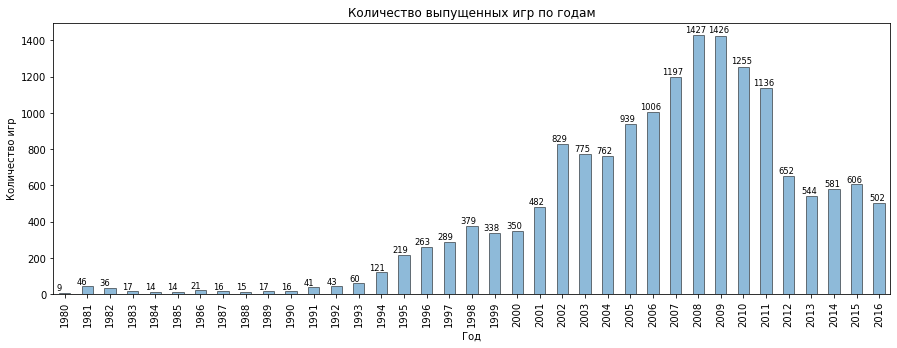

In [27]:
games_years = games[games['year_of_release'] > 0].pivot_table(index = 'year_of_release',
        values = 'name', aggfunc = 'count').sort_values('year_of_release', ascending = True)
ax_sub = games_years.plot.bar(alpha=0.5, figsize=(15,5), ec='black', legend=False)

for p in ax_sub.patches:
    ax_sub.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 'small', ha='center', va='bottom')

plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
None

При рассмотрении графика отмечаем начало тенденции к росту с 1994 года, что связано с выходом приставки Playstation 1. Далее, на фоне роста, отмечаем еще больший всплеск в 2002 году, что связано с выходом Playstation 2 и Microsoft Xbox.
Больше всего игр было выпущено в 2008-2009 годах, и после этого начался спад, связанный, вероятно, с ростом популярности игр на мобильных устройствах, который привел к уменьшению рынка видеоигр.

До 1994 года в год выпускалось менее 100 игр в год, поэтому для дальнейшего анализа будем использовать данные начиная с этого года.

### Продажи по платформам

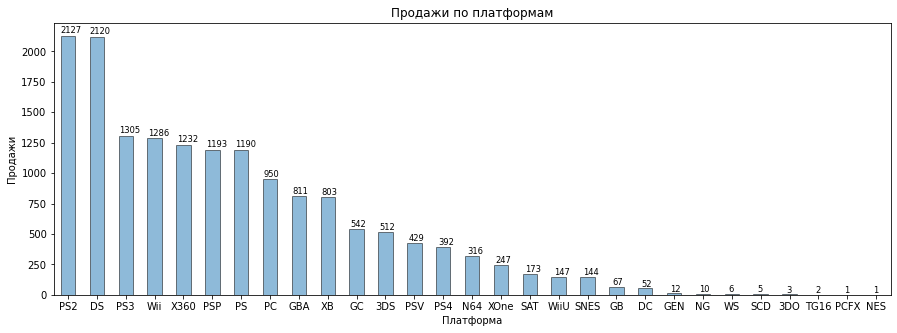

In [28]:
platform_sales = games[games['year_of_release'] >= 1994].pivot_table(index = 'platform',
      values = 'total_sales', aggfunc = 'count').sort_values('total_sales', ascending = False)
ax_sub = platform_sales.plot.bar(alpha=0.5, figsize=(15,5), ec='black', legend=False, rot = 0)

for p in ax_sub.patches:
    ax_sub.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 'small', ha='left', va='bottom')

plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
None

Больше всего продаж игр на PS2 и DS, остальные платформы заметно отстают.

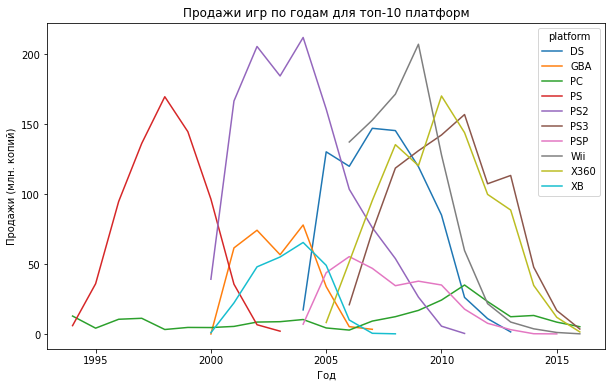

In [29]:
platform_top = platform_sales.head(10).index.tolist()
platform_top_sales = games[(games['platform'].isin(platform_top)) & (games['year_of_release'] >= 1994)].pivot_table(
    index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()

plt.figure(figsize=(10,6))
ax = sns.lineplot(x = 'year_of_release', y = 'total_sales', data = platform_top_sales, hue = 'platform')
ax.set(xlabel = 'Год', ylabel = 'Продажи (млн. копий)', title = 'Продажи игр по годам для топ-10 платформ')
plt.show()

Рассмотрев график, отмечаем, что в среднем платформы находятся на рынке на протяжении 10 лет, после чего продажи игр падают до нуля.\
При этом, если рассматривать отдельно версии Playstation, отмечаем, что на спаде предыдущей версии происходит выпуск и резкий рост продаж игр для следующей версии. Такая же закономерность прослеживается и у Xbox и его следующей версии Xbox360.

### Какие платформы лидируют по продажам, растут или падают?

Нашей целью является прогноз продаж игр на 2017 год. На предыдущем шаге мы узнали, что средняя продолжительность нахождения платформы на рынке составляет 10 лет. Исходя из этого, ограничим данные сроком с 2006 по 2016 год.

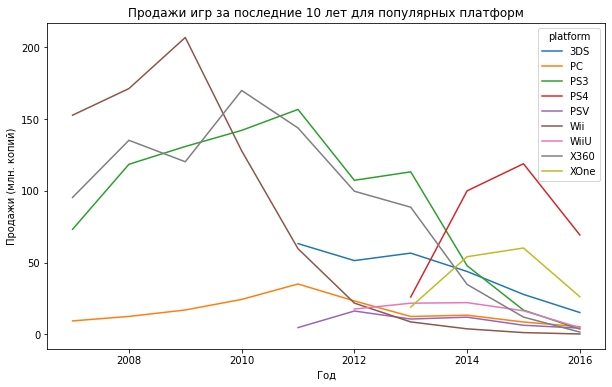

In [30]:
actual_platform = games[(games['year_of_release'] >= 2016)].pivot_table(index = ['platform'],
    values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False).head(10).index.tolist()
platform_trends = games[(games['platform'].isin(actual_platform)) & (games['year_of_release'] >= 2007)].pivot_table(
    index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()

plt.figure(figsize=(10,6))
ax = sns.lineplot(x = 'year_of_release', y = 'total_sales', data = platform_trends, hue = 'platform')
ax.set(xlabel = 'Год', ylabel = 'Продажи (млн. копий)', title = 'Продажи игр за последние 10 лет для популярных платформ')
plt.show()

При рассмотрении графика отмечаем, что наблюдался рост к 2009 году с последующим резким падением продаж игр для Wii. На этом фоне с 2006 по 2011 растут продажи игр для Xbox360 и PS3.\
На спаде продаж игр для PS3 выходит PS4 с закономерным ростом продаж. Одновременно с PS4 выходит XboxOne, однако по уровню продаж он отстает практически в два раза, при этом обе платформы имеют симметричный спад продаж с 2015 года.

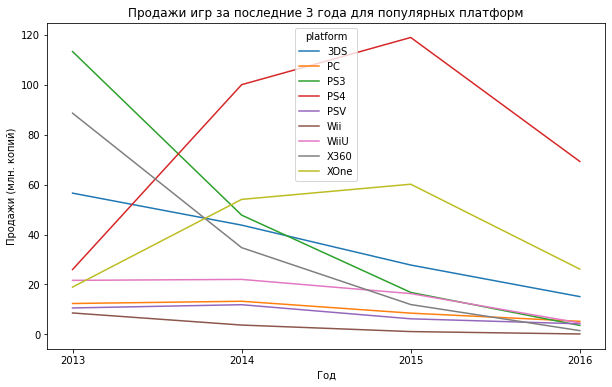

In [31]:
platform_trends = games[(games['platform'].isin(actual_platform))
& (games['year_of_release'] >= 2013)].pivot_table(
    index = ['platform','year_of_release'], values = 'total_sales',
    aggfunc = 'sum').reset_index()

plt.figure(figsize=(10,6))
ax = sns.lineplot(x = 'year_of_release', y = 'total_sales',
                  data = platform_trends, hue = 'platform')
ax.set(xlabel = 'Год', xticks=[2013,2014,2015,2016], ylabel = 'Продажи (млн. копий)', title = 'Продажи игр за последние 3 года для популярных платформ')
plt.show()

При рассмотрении аналогичного графика, но для последних 3 лет, отмечаем, что лидером по продажам является Playstation 4. XOne меет меньшие объемы продаж, однако на своем уровне показывает тенденцию к росту.
На этом фоне продажи для PS3 и Х360 падают, что объяснимо растущим успехом новых версий этих платформ.
3DS, находящаяся на рынке с 2011 года, имеет достаточно стабильные и высокие продажи и не выходит за рамки определенного нами ранее интервала жизнеспособности платформ.\
PC вообще не подвержены десятилетнему циклу жизни платформы и в данном датасете показывает стабильные продажи на своем уровне.
Нам известно, что в датасете представлены неполные данные за 2016 год, поэтому делать выводы о нисходящих трендах достоверно мы не можем. 

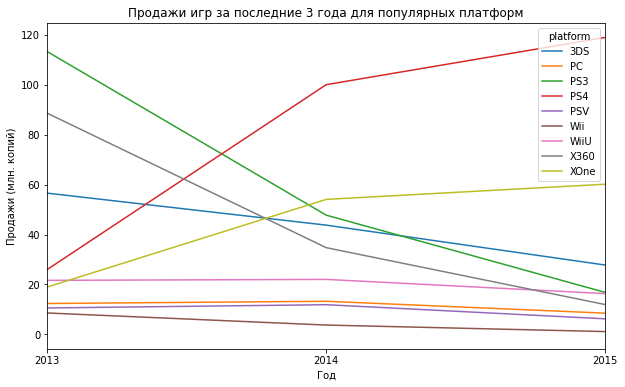

In [32]:
platform_trends = games[(games['platform'].isin(actual_platform))
& (games['year_of_release'] >= 2013)].pivot_table(
    index = ['platform','year_of_release'], values = 'total_sales',
    aggfunc = 'sum').reset_index()

plt.figure(figsize=(10,6))
ax = sns.lineplot(x = 'year_of_release', y = 'total_sales',
                  data = platform_trends, hue = 'platform')
ax.set(xlabel = 'Год', xticks=[2013,2014,2015,2016], ylabel = 'Продажи (млн. копий)',
       title = 'Продажи игр за последние 3 года для популярных платформ')
plt.xlim(2013, 2015)
plt.show()

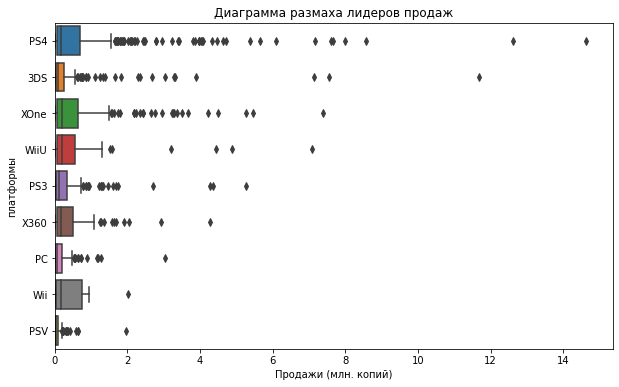

In [33]:
actual_platform_3_years = games[(games['platform'].isin(actual_platform))
& (games['year_of_release'] >= 2014)]
xlim = [0,None]

plt.figure(figsize=(10,6))
ax = sns.boxplot(x = actual_platform_3_years['total_sales'],
                 y = actual_platform_3_years['platform'])
ax.set(xlabel = 'Продажи (млн. копий)', ylabel = 'платформы',
       xlim = xlim, title = 'Диаграмма размаха лидеров продаж')
plt.show()

В данном случае, рассматриваем выбросы как хиты продаж.\
Для наглядности и удобства анализа, ограничим выборку 2 млн. проданных копий.

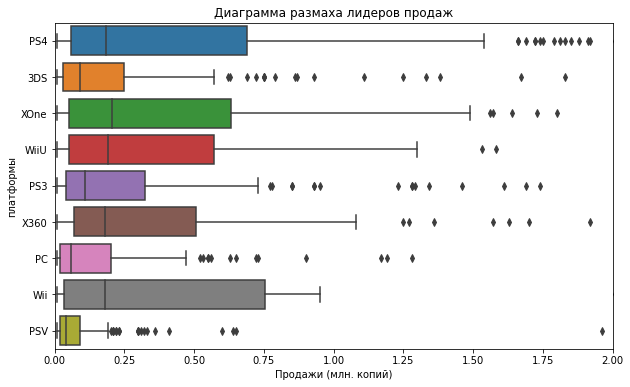

In [34]:
xlim = [0,2]

plt.figure(figsize=(10,6))
ax = sns.boxplot(x = actual_platform_3_years['total_sales'], y = actual_platform_3_years['platform'])
ax.set(xlabel = 'Продажи (млн. копий)', ylabel = 'платформы', xlim = xlim, title = 'Диаграмма размаха лидеров продаж')
plt.show()

Ранее мы выяснили, что за последние три года PS4 является лидером по продажам.\
Диаграмма размаха позволяет нам оценить медианы продаж: у XboxOne она несколько больше, чем у PS4, что может судить о стабильности продаж для XboxOne.
Однако у PS4 в диаграмме продаж больше выбросов (а для данного датасета выбросы равнозначны хитам).

In [35]:
# check
actual_platform_3_years[(actual_platform_3_years['platform'] == 'PS4')
& ((actual_platform_3_years['critic_score'] >= 1)
   | (actual_platform_3_years['user_score'] >= 1))].sort_values(by='user_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15020,Assault Suit Leynos,PS4,2016,Shooter,0.02,0.00,0.00,0.00,67.0,-10.0,E10+,0.02
14293,Just Dance 2017,PS4,2016,Misc,0.02,0.00,0.00,0.01,73.0,-10.0,E10+,0.03
8242,MotoGP 15,PS4,2015,Racing,0.00,0.12,0.03,0.02,66.0,-10.0,unknown,0.17
7479,Tony Hawk's Pro Skater 5,PS4,2015,Sports,0.09,0.08,0.00,0.03,32.0,15.0,T,0.20
12756,Rugby World Cup 2015,PS4,2015,Sports,0.00,0.05,0.00,0.01,25.0,19.0,E,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
4676,Farming Simulator 17,PS4,2016,Simulation,0.05,0.31,0.00,0.06,69.0,87.0,E,0.42
8886,The King of Fighters XIV,PS4,2016,Fighting,0.07,0.02,0.04,0.02,79.0,87.0,T,0.15
5120,Rocket League,PS4,2016,Sports,0.03,0.28,0.00,0.05,85.0,87.0,E,0.36
1107,Dark Souls III,PS4,2016,Role-Playing,0.65,0.45,0.34,0.22,89.0,88.0,M,1.66


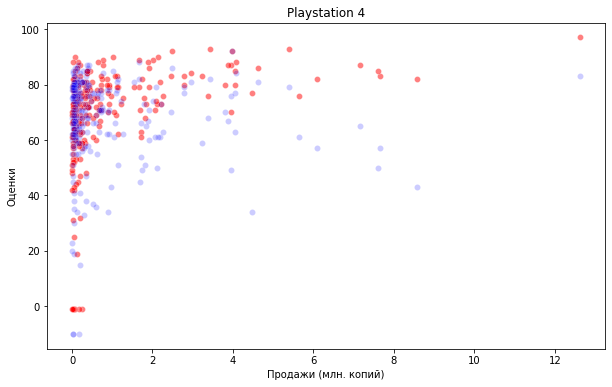

Корреляция продаж и оценки критиков для Playstation 4: 0.34
Корреляция продаж и оценки пользователей для Playstation 4: -0.004


In [36]:
platform_ps4 = actual_platform_3_years[(actual_platform_3_years['platform'] == 'PS4')
& ((actual_platform_3_years['critic_score'] >= 1)
   | (actual_platform_3_years['user_score'] >= 1))]
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='total_sales', y='critic_score', data = platform_ps4, alpha = 0.5, color='red',)
ax = sns.scatterplot(x='total_sales', y='user_score', data = platform_ps4, alpha = 0.2, color='blue');
ax.set(xlabel = 'Продажи (млн. копий)', ylabel = 'Оценки', title = 'Playstation 4')
plt.show()
print(f'Корреляция продаж и оценки критиков для Playstation 4:',
round(platform_ps4['total_sales'].corr(platform_ps4['critic_score']),3))
print(f'Корреляция продаж и оценки пользователей для Playstation 4:',
round(platform_ps4['total_sales'].corr(platform_ps4['user_score']),3))

На представленном графике красным цветом отмечены оценки критиков, голубым — оценки пользователей.\
Имеется слабо положительная связь (коэффициент корреляции 0.34) между оценками критиков и продажами, при этом отсутствие связи (коэффициент корреляции -0.004) между оценками пользователей и продажами.
Также отметим, что оценки пользователей несколько ниже, чем оценки критиков.

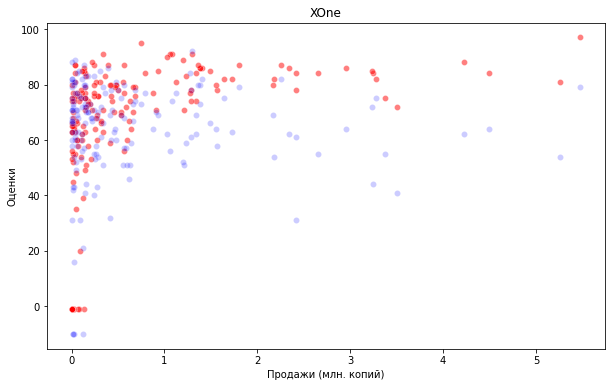

Корреляция продаж и оценки критиков для XboxOne: 0.375
Корреляция продаж и оценки пользователей для XboxOne: 0.01


In [37]:
platform_xone = actual_platform_3_years[(actual_platform_3_years['platform'] == 'XOne')
& ((actual_platform_3_years['critic_score'] >= 1)
   | (actual_platform_3_years['user_score'] >= 1))]
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='total_sales', y='critic_score', data = platform_xone, alpha = 0.5, color='red',)
ax = sns.scatterplot(x='total_sales', y='user_score', data = platform_xone, alpha = 0.2, color='blue');
ax.set(xlabel = 'Продажи (млн. копий)', ylabel = 'Оценки', title = 'XOne')
plt.show()
print(f'Корреляция продаж и оценки критиков для XboxOne:',
round(platform_xone['total_sales'].corr(platform_xone['critic_score']),3))
print(f'Корреляция продаж и оценки пользователей для XboxOne:',
round(platform_xone['total_sales'].corr(platform_xone['user_score']),3))

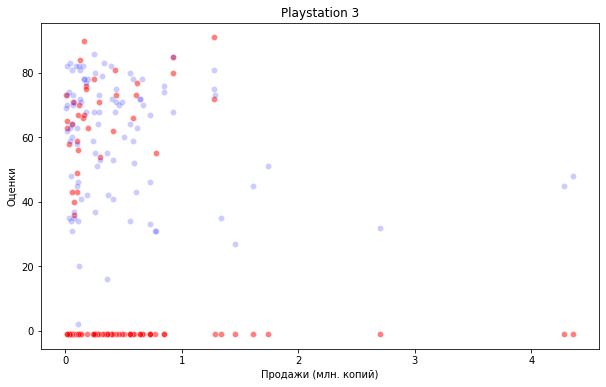

Корреляция продаж и оценки критиков для Playstation 3: -0.158
Корреляция продаж и оценки пользователей для Playstation 3: -0.167


In [38]:
platform_ps3 = actual_platform_3_years[(actual_platform_3_years['platform'] == 'PS3')
& ((actual_platform_3_years['critic_score'] >= 1) | (actual_platform_3_years['user_score'] >= 1))]
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='total_sales', y='critic_score', data = platform_ps3, alpha = 0.5, color='red',)
ax = sns.scatterplot(x='total_sales', y='user_score', data = platform_ps3, alpha = 0.2, color='blue');
ax.set(xlabel = 'Продажи (млн. копий)', ylabel = 'Оценки', title = 'Playstation 3')
plt.show()
print(f'Корреляция продаж и оценки критиков для Playstation 3:',
round(platform_ps3['total_sales'].corr(platform_ps3['critic_score']),3))
print(f'Корреляция продаж и оценки пользователей для Playstation 3:',
round(platform_ps3['total_sales'].corr(platform_ps3['user_score']),3))

In [39]:
platform_ps3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 255 to 16145
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             98 non-null     object 
 1   platform         98 non-null     object 
 2   year_of_release  98 non-null     int64  
 3   genre            98 non-null     object 
 4   na_sales         98 non-null     float64
 5   eu_sales         98 non-null     float64
 6   jp_sales         98 non-null     float64
 7   other_sales      98 non-null     float64
 8   critic_score     98 non-null     float64
 9   user_score       98 non-null     float64
 10  rating           98 non-null     object 
 11  total_sales      98 non-null     float64
dtypes: float64(7), int64(1), object(4)
memory usage: 10.0+ KB


В датасете по нашему фильтру набирается всего 98 записей об играх. 

In [40]:
platform_ps3['critic_score'].value_counts()

-1.0     62
 73.0     3
 66.0     2
 67.0     2
 63.0     2
 43.0     2
 71.0     2
 36.0     1
 72.0     1
 81.0     1
 70.0     1
 91.0     1
 90.0     1
 58.0     1
 56.0     1
 64.0     1
 78.0     1
 84.0     1
 55.0     1
 62.0     1
 76.0     1
 40.0     1
 65.0     1
 49.0     1
 85.0     1
 59.0     1
 75.0     1
 80.0     1
 77.0     1
 54.0     1
Name: critic_score, dtype: int64

При этом, у 62 записей из 98 нет оценки критиков, что еще больше уменьшает нашу выборку.\
Известно, что для корреляционного анализа важен размер выборки.

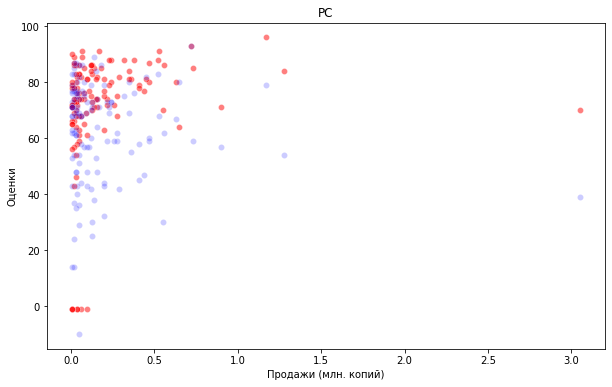

Корреляция продаж и оценки критиков для PC: 0.181
Корреляция продаж и оценки пользователей для PC: -0.053


In [41]:
platform_pc = actual_platform_3_years[(actual_platform_3_years['platform'] == 'PC')
& ((actual_platform_3_years['critic_score'] >= 1) | (actual_platform_3_years['user_score'] >= 1))]
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='total_sales', y='critic_score', data = platform_pc, alpha = 0.5, color='red',)
ax = sns.scatterplot(x='total_sales', y='user_score', data = platform_pc, alpha = 0.2, color='blue');
ax.set(xlabel = 'Продажи (млн. копий)', ylabel = 'Оценки', title = 'PC')
plt.show()
print(f'Корреляция продаж и оценки критиков для PC:',
round(platform_pc['total_sales'].corr(platform_pc['critic_score']),3))
print(f'Корреляция продаж и оценки пользователей для PC:',
round(platform_pc['total_sales'].corr(platform_pc['user_score']),3))

Рассмотрев диаграммы рассеяния и подсчитав корреляцию для четырех популярных платформ, отмечаем закономерность: имеется слабая положительная связь между оценкой критиков и продажами.\
При этом, связь между оценкой пользователей и продажами отсутствует (коэффициент корреляции <0.25).

### Жанры

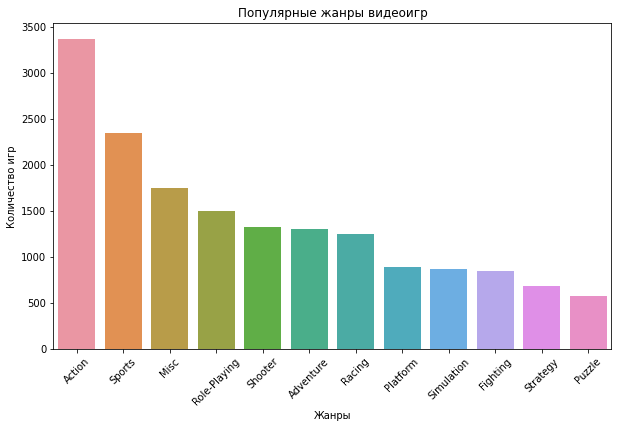

In [42]:
game_genre_count = games.pivot_table(index = 'genre', values = 'name',
                                  aggfunc = 'count').sort_values('name', ascending = False)
plt.figure(figsize=(10,6))
ax = sns.barplot(x = game_genre_count.index, y = 'name', data = game_genre_count)
ax.set(xlabel = 'Жанры', ylabel = 'Количество игр', title = 'Популярные жанры видеоигр')
plt.xticks(rotation = 45)
plt.show()

На данном графике — распределение игр по популярности жанров за всё время наблюдения.

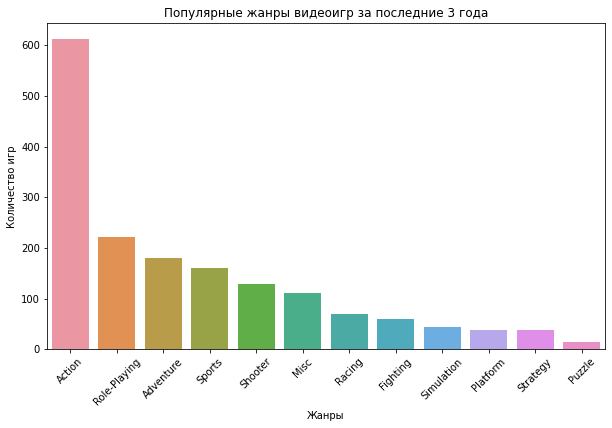

In [43]:
actual_game_genre_count = actual_platform_3_years.pivot_table(index = 'genre', values = 'name',
                                                      aggfunc = 'count').sort_values('name', ascending = False)
plt.figure(figsize=(10,6))
ax = sns.barplot(x = actual_game_genre_count.index, y = 'name', data = actual_game_genre_count)
ax.set(xlabel = 'Жанры', ylabel = 'Количество игр', title = 'Популярные жанры видеоигр за последние 3 года')
plt.xticks(rotation = 45)
plt.show()

На данном графике — распределение игр по популярности жанров за последние три года.\
Сравнивая с предыдущим графиком, отмечаем, что игры жанра Action всё так же на первом месте по популярности, а также увеличение количества игр жанра Role-Playing с их миграцией на вторую позицию по популярности.

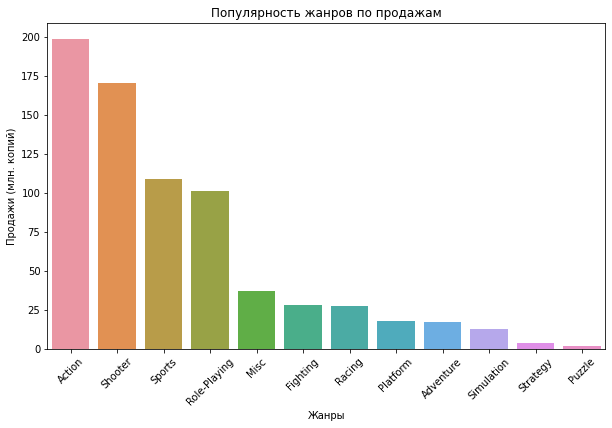

In [44]:
actual_game_genre_sales = actual_platform_3_years.pivot_table(index = 'genre', values = 'total_sales',
                                                      aggfunc = 'sum').sort_values('total_sales', ascending = False)
plt.figure(figsize=(10,6))
ax = sns.barplot(x = actual_game_genre_sales.index, y = 'total_sales', data = actual_game_genre_sales)
ax.set(xlabel = 'Жанры', ylabel = 'Продажи (млн. копий)', title = 'Популярность жанров по продажам')
plt.xticks(rotation = 45)
plt.show()

На первом месте по продажам остается Action, также в лидерах Shooter, Sports и Role-Playing. 

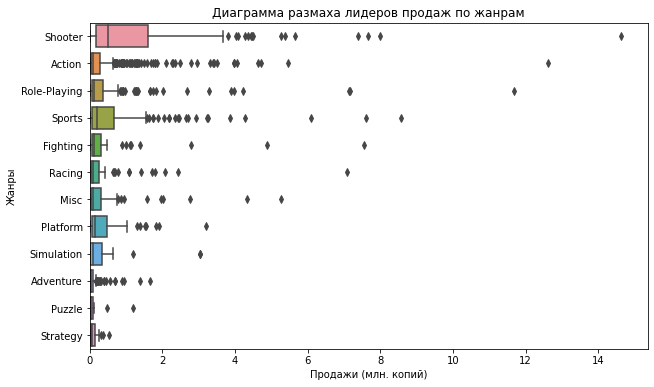

In [45]:
xlim = [0,None]
plt.figure(figsize=(10,6))
ax = sns.boxplot(x = actual_platform_3_years['total_sales'], y = actual_platform_3_years['genre'])
ax.set(xlabel = 'Продажи (млн. копий)', ylabel = 'Жанры', xlim = xlim, title = 'Диаграмма размаха лидеров продаж по жанрам')
plt.show()

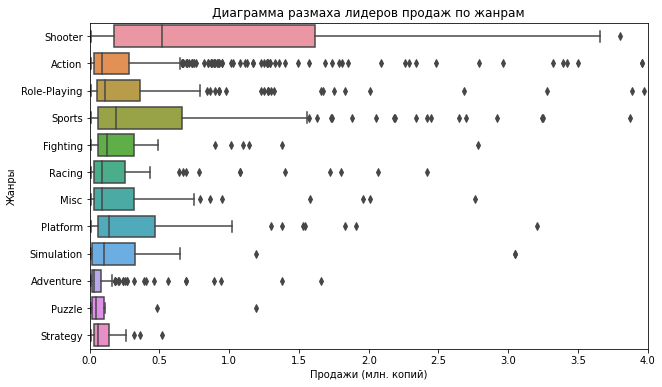

In [46]:
xlim = [0,4]
plt.figure(figsize=(10,6))
ax = sns.boxplot(x = actual_platform_3_years['total_sales'], y = actual_platform_3_years['genre'])
ax.set(xlabel = 'Продажи (млн. копий)', ylabel = 'Жанры', xlim = xlim, title = 'Диаграмма размаха лидеров продаж по жанрам')
plt.show()

Изучая диаграммы размаха лидеров продаж по жанрам, отмечаем, что ящик для игр жанра Shooter самый большой — это означает большой разброс популярности игр, однако таких игр много, и медиана продаж достаточно высокая, выше, чем у других жанров. Также у игр этого жанра редко бывают хиты продаж, о чем мы можем судить по малому количеству выбросов.\
На втором месте по популярности игры жанра Action, у которых ящик гораздо короче, медиана ниже, при этом самое большое количество выбросов — в этом жанре чаще всего бывают хиты продаж.

### Выводы
Проведя исследовательский анализ данных, мы выяснили, что:
* Больше всего игр было выпущено в 2008-2009 годах.
* За всё время наблюдения больше всего было продано игр для PS2 и DS.
* В среднем платформы находятся на рынке на протяжении 10 лет, после чего продажи игр для конкретной платформы падают до нуля.
* При этом, если рассматривать отдельно версии Playstation, отмечаем, что на спаде предыдущей версии происходит выпуск и резкий рост продаж игр для следующей версии.
* Такая же закономерность прослеживается и у Xbox и его следующей версии Xbox360.
* При рассмотрении информации за последние 10 лет датасета (2007-2016) отметили популярность Wii в 2009 году. На этом фоне с 2006 по 2011 растут продажи игр для Xbox360 и PS3.
* При рассмотрении аналогичной информации для последних 3 лет, отмечаем, что лидером по продажам является Playstation 4. XOne имеет меньшие объемы продаж, однако на своем уровне показывает тенденцию к росту. На этом фоне продажи для PS3 и Х360 падают, что объяснимо растущим успехом новых версий этих платформ. 3DS, находящаяся на рынке с 2011 года, имеет достаточно стабильные и высокие продажи и не выходит за рамки определенного нами ранее интервала жизнеспособности платформ. 
PC не подвержены десятилетнему циклу жизни платформы и в данном датасете показывает стабильные продажи на своем уровне. Нам известно, что в датасете представлены неполные данные за 2016 год, поэтому делать выводы о нисходящих трендах достоверно мы не можем 
* При изучении данных за последние 3 года датасета (2014-2016), отмечаем, что лидером по продажам является Playstation 4. На втором месте Xbox One, однако очевиден нисходящий тренд как для двух лидеров, так и для остальных платформ. Кроме того, не вышла из установленного нами десятилетнего жизненного цикла платформы 3DS, не будем списывать её со счетов, а также принимаем во внимание то, что для PC в принципе не актуален десятилетний цикл и в представленном датасете PC показывает стабильные продажи на своем уровне на протяжении всего периода наблюдения.
* За последние три года PS4 является лидером по продажам.
* Оценки критиков умеренно влияют на продажи игр, а оценка пользователей практически не имеет влияния на продажи. При этом, оценки пользователей несколько ниже оценок критиков. Эта закономерность применима ко всем платформам.
* Во все времена наблюдения жанр Action занимает первое место по количеству игр. В последние три года вторую строку занимает жанр Role-Playing.
* По продажам на первом месте Action за счет большого количества хитов. Однако продажи шутеров стабильнее. Также в лидерах жанры Sports (со схожей стратегией, что у шутеров: их много, продажи стабильны, высокая медиана) и Role-Playing (стратегия близка к экшен-играм: большое количество хитов).

## Портрет пользователя каждого региона

In [47]:
platform_region_sales=actual_platform_3_years.pivot_table(index='platform',
                                                  values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
platform_region_sales.reset_index(inplace=True)

In [48]:
eu_sales_df = platform_region_sales[['platform','eu_sales']].sort_values('eu_sales', ascending=False).reset_index(drop=True)
eu_sales_other = eu_sales_df[5:].append({'platform': 'Other', 'eu_sales': eu_sales_df['eu_sales'][5:].sum()}, ignore_index=True)
eu_sales_top = eu_sales_df[:5].append(eu_sales_other.loc[4]).reset_index(drop=True)

jp_sales_df = platform_region_sales[['platform','jp_sales']].sort_values('jp_sales', ascending=False).reset_index(drop=True)
jp_sales_other = jp_sales_df[5:].append({'platform': 'Other', 'jp_sales': jp_sales_df['jp_sales'][5:].sum()}, ignore_index=True)
jp_sales_top = jp_sales_df[:5].append(jp_sales_other.loc[4]).reset_index(drop=True)

na_sales_df = platform_region_sales[['platform','na_sales']].sort_values('na_sales', ascending=False).reset_index(drop=True)
na_sales_other = na_sales_df[5:].append({'platform': 'Other', 'na_sales': na_sales_df['na_sales'][5:].sum()}, ignore_index=True)
na_sales_top = na_sales_df[:5].append(na_sales_other.loc[4]).reset_index(drop=True)

other_sales_df = platform_region_sales[['platform','other_sales']].sort_values('other_sales', ascending=False).reset_index(drop=True)
other_sales_other = other_sales_df[5:].append({'platform': 'Other', 'other_sales': other_sales_df['other_sales'][5:].sum()}, ignore_index=True)
other_sales_top = other_sales_df[:5].append(other_sales_other.loc[4]).reset_index(drop=True)

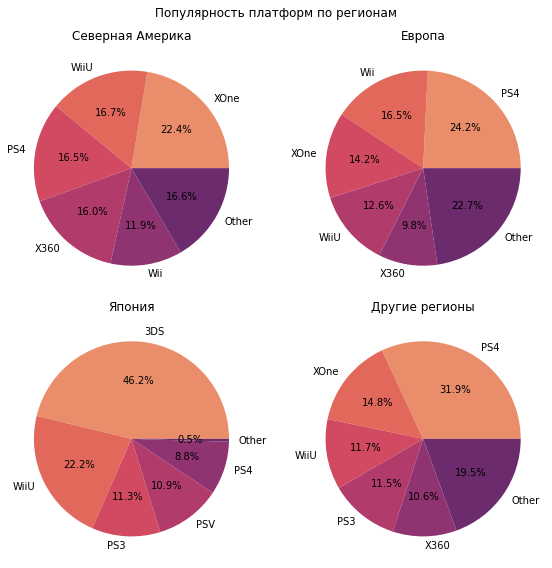

In [49]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))
palette = sns.color_palette('flare')
fig.suptitle('Популярность платформ по регионам')
ax1.pie(na_sales_top['na_sales'], labels = na_sales_top['platform'], autopct='%1.1f%%', colors = palette, normalize=True)
ax1.set_title('Северная Америка')
ax2.pie(eu_sales_top['eu_sales'], labels = eu_sales_top['platform'], autopct='%1.1f%%', colors = palette, normalize=True)
ax2.set_title('Европа')
ax3.pie(jp_sales_top['jp_sales'], labels = jp_sales_top['platform'], autopct='%1.1f%%', colors = palette, normalize=True)
ax3.set_title('Япония')
ax4.pie(other_sales_top['other_sales'], labels = other_sales_top['platform'], autopct='%1.1f%%', colors = palette, normalize=True)
ax4.set_title('Другие регионы')
fig.tight_layout()

Изучая круговые диаграммы популярности платформ по регионам, отмечаем различия в предпочтениях Европы и Северной Америки: в Европе чуть меньше четверти рынка занимает PS4, затем следуют платформы Wii, Xbox One, WiiU и Xbox360. В Северной Америке наоборот, на первом месте Xbox One, затем WiiU, PS4, Xbox360 и Wii.\
В Японии картина иная: здесь почти с половину ранка занимает портативная система Nintendo 3DS. Далее по популярности следуют WiiU и семейство PlayStation: PS3, PS4, PSV. Другие платформы представлены минимально (<0.5%).\
В сборной группе других регионов предпочтения близки к предпочтениям Европы с большей популярностью PS4.

In [50]:
# check

actual_platform_3_years.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


In [51]:
genre_region_sales=actual_platform_3_years.pivot_table(index='genre',
                                                       values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
genre_region_sales.reset_index(inplace=True)

In [52]:
eu_genre_df = genre_region_sales[['genre','eu_sales']].sort_values('eu_sales', ascending=False).reset_index(drop=True)
eu_genre_other = eu_genre_df[5:].append({'genre': 'Other',
                                         'eu_sales': eu_genre_df['eu_sales'][5:].sum()}, ignore_index=True)
eu_genre_top = eu_genre_df[:5].append(eu_genre_other.loc[7]).reset_index(drop=True)

jp_genre_df = genre_region_sales[['genre','jp_sales']].sort_values('jp_sales', ascending=False).reset_index(drop=True)
jp_genre_other = jp_genre_df[5:].append({'genre': 'Other',
                                         'jp_sales': jp_genre_df['jp_sales'][5:].sum()}, ignore_index=True)
jp_genre_top = jp_genre_df[:5].append(jp_genre_other.loc[7]).reset_index(drop=True)

na_genre_df = genre_region_sales[['genre','na_sales']].sort_values('na_sales', ascending=False).reset_index(drop=True)
na_genre_other = na_genre_df[5:].append({'genre': 'Other',
                                         'na_sales': na_genre_df['na_sales'][5:].sum()}, ignore_index=True)
na_genre_top = na_genre_df[:5].append(na_genre_other.loc[7]).reset_index(drop=True)

other_genre_df = genre_region_sales[['genre','other_sales']].sort_values('other_sales', ascending=False).reset_index(drop=True)
other_genre_other = other_genre_df[5:].append({'genre': 'Other',
                                               'other_sales': other_genre_df['other_sales'][5:].sum()}, ignore_index=True)
other_genre_top = other_genre_df[:5].append(other_genre_other.loc[7]).reset_index(drop=True)

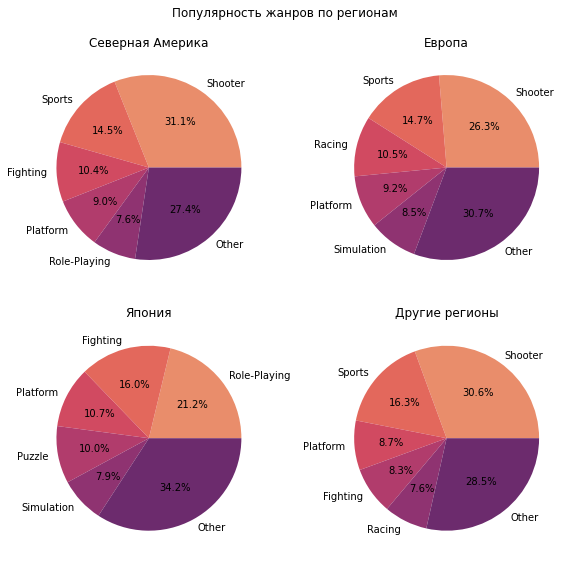

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))
palette = sns.color_palette('flare')
fig.suptitle('Популярность жанров по регионам')
ax1.pie(na_genre_top['na_sales'], labels = na_genre_top['genre'],
        autopct='%1.1f%%', colors = palette, normalize=True)
ax1.set_title('Северная Америка')
ax2.pie(eu_genre_top['eu_sales'], labels = eu_genre_top['genre'],
        autopct='%1.1f%%', colors = palette, normalize=True)
ax2.set_title('Европа')
ax3.pie(jp_genre_top['jp_sales'], labels = jp_genre_top['genre'],
        autopct='%1.1f%%', colors = palette, normalize=True)
ax3.set_title('Япония')
ax4.pie(other_genre_top['other_sales'], labels = other_genre_top['genre'],
        autopct='%1.1f%%', colors = palette, normalize=True)
ax4.set_title('Другие регионы')
fig.tight_layout()

Диаграммы популярности жанров в Северной Америке, Европе и других странах похожи: лидирующие позиции занимают шутеры и спортивные игры, далее идут платформеры.\
И снова Япония отличается своими предпочтениями: на первом месте ролевые игры, затем файтинги, платформеры, пазлы и симуляторы.\
Во всех странах наблюдаем, что около трети продаж собирается из игр разных жанров, на диаграммах объединенных в Other.

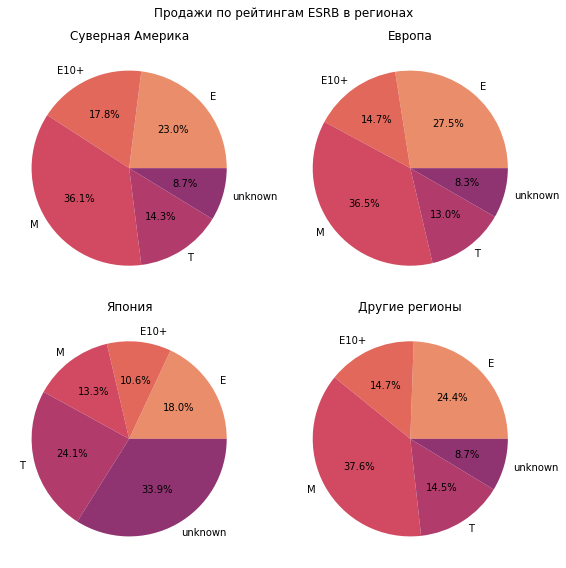

In [54]:
rating_region_sales=actual_platform_3_years.pivot_table(index='rating',
                                                values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))
palette = sns.color_palette('flare')
fig.suptitle('Продажи по рейтингам ESRB в регионах')
ax1.pie(rating_region_sales['na_sales'], labels = rating_region_sales.index,
        autopct='%1.1f%%', colors = palette, normalize=True)
ax1.set_title('Суверная Америка')
ax2.pie(rating_region_sales['eu_sales'], labels = rating_region_sales.index,
        autopct='%1.1f%%', colors = palette, normalize=True)
ax2.set_title('Европа')
ax3.pie(rating_region_sales['jp_sales'], labels = rating_region_sales.index,
        autopct='%1.1f%%', colors = palette, normalize=True)
ax3.set_title('Япония')
ax4.pie(rating_region_sales['other_sales'], labels = rating_region_sales.index,
        autopct='%1.1f%%', colors = palette, normalize=True)
ax4.set_title('Другие регионы')
fig.tight_layout()

По рейтингам ESRB в Северной Америке, Европе и других регионах больше трети продаж — это игры с рейтингом M («Mature» — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.)\
В Японии солидную долю занимают игры с неустановленным рейтингом. На втором месте рейтинг Т («Teen» — «Подросткам»: Игра подходит для лиц от 13 лет). На рейтинг М, популярный в других регионах, приходится 13,3% от продаж. Далее по распространению "детские" - категории E и E10+.\
Такая большая доля игр с неустановленным рейтингом в Японии связана с тем, что ESRB функционирует и присуждает рейтинги играм, выпущенным на территории США и Канады, тогда как в Японии существует своя собственная система рейтингов игр, CERO. Она имеет схожий принцип, но другие обозначения, и в представленном датасете нет информации о рейтингах других систем, кроме ESRB. Кроме того, Япония активно производит видеоигры, и местные игры могут не иметь оценки от ESRB, так как не выходят за пределы локального рынка. \
Однозначный вывод о влиянии рейтинга на продажи можно сделать только для Северной Америки, Европы и других регионах, в которых наблюдается примерно одинаковая картина: популярны игры со "взрослым" рейтингом.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* Нулевая гипотеза (H0): средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Альтернативная гипотеза (H1): средние пользовательские рейтинги платформ Xbox One и PC разные

In [55]:
user_score_pc = games[(games['platform'] == 'PC') & (games['user_score'] >= 1) & (games['year_of_release'] >= 2013)]['user_score']
user_score_xone = games[(games['platform'] == 'XOne') & (games['user_score'] >= 1)]['user_score']

print('Количество значений выборки для платформы PC:', user_score_pc.shape[0])
print('Количество значений выборки для платформы Xbox One:', user_score_xone.shape[0])

Количество значений выборки для платформы PC: 155
Количество значений выборки для платформы Xbox One: 182


Получились выборки заметно отличающиеся по объему, а значит есть вероятность, что дисперсии у совокупностей разные.

In [56]:
alpha = 0.05

result = st.ttest_ind(user_score_pc, user_score_xone, equal_var = False, alternative = 'two-sided')

print('p-value ', round(result.pvalue, 5))

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-value  0.1476
Не можем отвергнуть нулевую гипотезу


In [57]:

# проверка
print('Среднее значение оценок пользователей платформы PC:', round(user_score_pc.mean(),2))
print('Среднее значение оценок пользователей платформы Xbox One:', round(user_score_xone.mean(),2))

Среднее значение оценок пользователей платформы PC: 62.7
Среднее значение оценок пользователей платформы Xbox One: 65.21


Применив t-тест для проверки гипотезы, мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.

### Средние пользовательские рейтинги жанров Action и Sports разные

* Нулевая гипотеза (H0): средние пользовательские рейтинги жанров Action и Sports равны
* Альтернативная гипотеза (H1): средние пользовательские рейтинги жанров Action и Sports разные

In [58]:
user_score_аction = games[(games['genre'] == 'Action') & (games['user_score'] >= 1)]['user_score']
user_score_sports = games[(games['genre'] == 'Sports') & (games['user_score'] >= 1)]['user_score']

print('Количество значений выборки для жанра Action:', user_score_аction.shape[0])
print('Количество значений выборки для жанра Sports:', user_score_sports.shape[0])

Количество значений выборки для жанра Action: 1830
Количество значений выборки для жанра Sports: 1102


In [59]:
alpha = 0.05

result = st.ttest_ind(user_score_аction, user_score_sports, equal_var = False)

print('p-value ', round(result.pvalue, 5))

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-value  0.12025
Не можем отвергнуть нулевую гипотезу


In [60]:
# проверка
print('Среднее значение оценок пользователей жанра Action:', round(user_score_аction.mean(),2))
print('Среднее значение оценок пользователей жанра Sports:', round(user_score_sports.mean(),2))

Среднее значение оценок пользователей жанра Action: 70.54
Среднее значение оценок пользователей жанра Sports: 69.63


Применив t-тест для проверки гипотезы, мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны.

Для проверки гипотез в обоих случаях использовали t-тест, так как имеем две независимые выборки и гипотезу о равенстве средних двух генеральных совокупностей. Нулевая гипотеза предполагает самый простой вариант — средние совокупностей равны. Альтернативная, соответственно, предполагает неравенство любого рода.

## Выводы

Для анализа были предоставлены данные о продажах видеоигр до 2016 года для различных платформ и регионов (Северная Америка, Европа, Япония, другие регионы).
* Больше всего игр было выпущено в 2008-2009 годах.
* За всё время наблюдения больше всего было продано игр для PS2 и DS.
* В среднем платформы находятся на рынке на протяжении 10 лет, после чего продажи игр для конкретной платформы падают до нуля.
* При этом, если рассматривать отдельно версии Playstation, отмечаем, что на спаде предыдущей версии происходит выпуск и резкий рост продаж игр для следующей версии.
* Такая же закономерность прослеживается и у Xbox и его следующей версии Xbox360.
* При рассмотрении информации за последние 10 лет датасета (2007-2016) отметили популярность Wii в 2009 году. На этом фоне с 2006 по 2011 растут продажи игр для Xbox360 и PS3.
* На спаде продаж игр для PS3 выходит PS4 с закономерным ростом продаж. Одновременно с PS4 выходит XboxOne, однако по уровню продаж он отстает практически в два раза, при этом обе платформы имеют симметричный спад продаж с 2015 года. Однако нам предоставлены неполные данные за 2016 год, и достоверно судить о спаде мы не можем.
* При изучении данных за последние 3 года датасета (2014-2016), отмечаем, что лидером по продажам является Playstation 4. На втором месте Xbox One, однако очевиден нисходящий тренд как для двух лидеров, так и для остальных платформ.
* За последние три года PS4 является лидером по продажам.
* Оценки критиков умеренно влияют на продажи игр, а оценка пользователей практически не имеет влияния на продажи. При этом, оценки пользователей несколько ниже оценок критиков. Эта закономерность применима ко всем платформам.
* Во все времена наблюдения жанр Action занимает первое место по количеству игр. В последние три года вторую строку занимает жанр Role-Playing.
По продажам на первом месте Action за счет большого количества хитов. Однако продажи шутеров стабильнее. Также в лидерах жанры Sports (со схожей стратегией, что у шутеров: их много, продажи стабильны, высокая медиана) и Role-Playing (стратегия близка к экшен-играм: большое количество хитов).
* Имеются различия в предпочтениях Европы и Северной Америки: в Европе чуть меньше четверти рынка занимает PS4, затем следуют платформы Wii, Xbox One, WiiU и Xbox360. В Северной Америке наоборот, на первом месте Xbox One, затем WiiU, PS4, Xbox360 и Wii. В сборной группе других регионов предпочтения близки к предпочтениям Европы с большей популярностью PS4. В Японии почти с половину ранка занимает портативная система Nintendo 3DS. Далее по популярности следуют WiiU и семейство PlayStation: PS3, PS4, PSV. Другие платформы представлены минимально (<0.5%).
* В Северной Америке, Европе и других странах лидирующие позиции по жанрам занимают шутеры и спортивные игры, далее идут платформеры. Япония отличается своими предпочтениями: на первом месте ролевые игры, затем файтинги, платформеры, пазлы и симуляторы.
* По рейтингам ESRB в Северной Америке, Европе и других регионах больше трети продаж — это игры с рейтингом M («Mature» — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.) В Японии солидную долю занимают игры с неустановленным рейтингом, что связано с наличием в Японии своей собственной системы рейтинга видеоигр и развитым локальным рынком производства видеоигр, которые, соответственно, не получают оценку от ESRB. На втором месте рейтинг Т («Teen» — «Подросткам»: Игра подходит для лиц от 13 лет). На рейтинг М, популярный в других регионах, приходится 13,3% от продаж. Далее по распространению "детские" - категории E и E10+.

В ходе исследования не были опровергнуты следующие гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC равны.
* Средние пользовательские рейтинги жанров Action и Sports равны.